<a href="https://colab.research.google.com/github/OrangeP1anet/math-python/blob/main/lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nを法とした行列を用いた暗号

復号化する暗号文の入力は

\begin{pmatrix}
x11 & x12 \\
x21 & x22 \\
\end{pmatrix}
or
\begin{pmatrix}
x11 & x12 & x13 \\
x21 & x22 & x23 \\
\end{pmatrix}

とし、入力の順番は **x11 ,x12, x13, x21 ,x22 ,x23** とする。

arr_pは平文の一部、arr_cは暗号文の一部

文字列に対応する数値は以下の表から得る

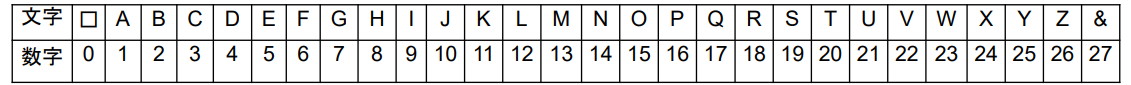

## Installation

---


```
import numpy as np
import sympy as sp
```

In [1]:
import sympy as sp
import numpy as np

# 逆行列を求める関数
def gyaku(arr, mod):
    # インバース|A|を求める
    a = (arr[0][0] * arr[1][1]) - (arr[0][1] * arr[1][0]) % mod
    kx = sp.gcdex(a, mod)[0]

    # Nを法とした逆数
    arr_inv = np.array([[arr[1][1], -arr[0][1]], [-arr[1][0], arr[0][0]]])
    return ((kx * arr_inv) % mod) % mod

# 入力する関数, numberには行列の大きさを渡す
def enter(arr, number):
    if number == 2:
        arr[0][0] = int(input("Enter x11: "))
        arr[0][1] = int(input("Enter x12: "))
        arr[1][0] = int(input("Enter x21: "))
        arr[1][1] = int(input("Enter x22: "))
    elif number == 3:
        arr[0][0] = int(input("Enter x11: "))
        arr[0][1] = int(input("Enter x12: "))
        arr[0][2] = int(input("Enter x13: "))
        arr[1][0] = int(input("Enter x21: "))
        arr[1][1] = int(input("Enter x22: "))
        arr[1][2] = int(input("Enter x23: "))
    return arr


# numpy配列を宣言、初期化
arr_p = np.array([[1, 2], [3, 4]])
arr_c = np.array([[1, 2], [3, 4]])

# 関数を使った入力
print("平文の一部を入力")
arr_p = enter(arr_p, 2)
print("暗号文の一部を入力")
arr_c = enter(arr_c, 2)
mod = int(input("Enter mod: "))

# 関数を使って逆行列を求める
# 行列の積はnp.dotを使用し、暗号鍵を求める
ans = gyaku(arr_p, mod)
ans = np.dot(arr_c, ans) % mod

# 暗号鍵を出力
print("暗号鍵は")
print(ans, f"mod({mod})")

# 関数を使って逆行列を求める
ans = gyaku(ans, mod)

# 復号鍵を出力
print("復号鍵は")
print(ans, f"mod({mod})")

# 復号化したい暗号文を入力
# 暗号文が4文字か6文字か選択する
print("復号化したい暗号文の文字数を入力(4 or 6)")
ifWordCount = int(input("Enter 4 or 6: "))

if ifWordCount == 4:
    arr_C = np.array([[1, 2], [3, 4]])
    arr_C = enter(arr_C, 2)
elif ifWordCount == 6:
    arr_C = np.array([[1, 2, 3], [4, 5, 6]])
    arr_C = enter(arr_C, 3)

# 行列の積はnp.dotを使用し、復号化
ans = np.dot(ans, arr_C) % mod

print(ans)

平文の一部を入力
Enter x11: 19
Enter x12: 20
Enter x21: 1
Enter x22: 15
暗号文の一部を入力
Enter x11: 18
Enter x12: 9
Enter x21: 23
Enter x22: 13
Enter mod: 28
暗号鍵は
[[5 7]
 [4 3]] mod(28)
復号鍵は
[[17 7]
 [24 19]] mod(28)
復号化したい暗号文の文字数を入力(4 or 6)
Enter 4 or 6: 6
Enter x11: 20
Enter x12: 21
Enter x13: 12
Enter x21: 5
Enter x22: 12
Enter x23: 3
[[11 21 1]
 [15 4 9]]
